In [1]:
#!/usr/bin/env python
# coding: utf-8
from __future__ import absolute_import, division, print_function
from tensorflow.keras.layers import Lambda, Dense, Input, Layer, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.backend import concatenate
import tensorflow as tf
import argparse



In [2]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in tf.config.list_physical_devices("GPU"):
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.set_visible_devices(gpus[0], 'GPU')

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
# standard numerical library imports
import numpy as np
import math
import scipy as sp
import matplotlib.pyplot as plt
import os

# energyflow imports
import energyflow as ef
from energyflow.archs import PFN
from energyflow.utils import data_split, to_categorical


In [4]:
# Global plot settings
from matplotlib import rc
import matplotlib.font_manager
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)


In [5]:
BatchSize = 40000
evNum = 40000000

print('BatchSize: '+str(BatchSize))
print('evNum: '+str(evNum))


BatchSize: 40000
evNum: 40000000


In [6]:
outDir = '/afs/desy.de/user/v/vaguglie/www/NN/Hdamp13TeV/Up/Train_BS%i_%ievents' %(BatchSize, evNum)
if not os.path.isdir(outDir):
      os.makedirs(outDir)


In [7]:
pythia_text = r'$POWHEG \; (hvq) \; pp \to  t\bar{t}$'
def make_legend(ax, title):
    leg = ax.legend(frameon=False)
    leg.set_title(title, prop={'size':20})
    leg.texts[0].set_fontsize(20)
    leg._legend_box.align = "left"
    plt.tight_layout()

# Global plot settings
from matplotlib import rc
import matplotlib.font_manager

import mplhep as hep
plt.style.use(hep.style.CMS)

In [8]:
### Da qui!!!

In [9]:
dataset=np.load('/nfs/dust/cms/user/vaguglie/converterLHEfiles/Hdamp13TeV/X1_Train_13TeV_2.305_plot.npz')
print(dataset.files)
X0=dataset['a']

['a', 'b']


In [10]:
dataset=np.load('/nfs/dust/cms/user/vaguglie/converterLHEfiles/Hdamp13TeV/X0_Train_13TeV_1.379_plot.npz')
print(dataset.files)
X1=dataset['a']

['a', 'b']


In [11]:
print(X0.shape)
print(X1.shape)

(39059886, 2, 6)
(39059886, 2, 6)


In [12]:
print(X0[6,0,0])
print(X1[6,0,0])

2.0850243594034756
1.1809329589502355


In [16]:
Y0 = np.array([0. for i in range(X0.shape[0])])
Y1 = np.array([1. for i in range(X1.shape[0])])

print(Y0.shape)
print(Y1.shape)

(39059886,)
(39059886,)


In [17]:
Y = np.concatenate((Y0, Y1))
Y = to_categorical(Y, num_classes=2)

X = []
X = np.concatenate((X0,X1))
print(X.shape)
print(Y.shape)


(78119772, 2, 6)
(78119772, 2)


In [18]:
X_train, X_val, Y_train, Y_val = data_split(X, Y, test=0.25, shuffle=True)

print(X_train.shape)
print(Y_train.shape)

print(X_val.shape)
print(Y_val.shape)


(58589829, 2, 6)
(58589829, 2)
(19529943, 2, 6)
(19529943, 2)


In [19]:
from math import *

# network architecture parameters
Phi_sizes = (100,100, 128)
F_sizes = (100,100, 100)

dctr = PFN(input_dim=6,
           Phi_sizes=Phi_sizes, F_sizes=F_sizes,
           summary=False)

from tensorflow import keras

save_label = 'DCTR_13TeV_2.305_BS40K_40Mevents_toBeSure'

checkpoint = keras.callbacks.ModelCheckpoint('/afs/desy.de/user/v/vaguglie/saved_models_Hdamp/' + save_label + '.h5',
                                                monitor='val_loss',
                                                verbose=2,
                                                save_best_only=True,
                                                mode='min')

CSVLogger = keras.callbacks.CSVLogger('/afs/desy.de/user/v/vaguglie/saved_models_Hdamp/' + save_label + '_loss.csv', append=False)

EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                              min_delta=0,
                                              patience=10,
                                              verbose=1,
                                              restore_best_weights=True)
callbacks = [checkpoint, CSVLogger, EarlyStopping]


Starting training
Epoch 1/1000
1465/1465 [==============================] - 40s 24ms/step - loss: 0.6969 - acc: 0.5019 - val_loss: 0.6932 - val_acc: 0.5021

Epoch 00001: val_loss improved from inf to 0.69324, saving model to /afs/desy.de/user/v/vaguglie/saved_models_Hdamp/DCTR_13TeV_2.305_BS40K_40Mevents_toBeSure.h5
Epoch 2/1000
1465/1465 [==============================] - 34s 23ms/step - loss: 0.6932 - acc: 0.5029 - val_loss: 0.6931 - val_acc: 0.5036

Epoch 00002: val_loss improved from 0.69324 to 0.69314, saving model to /afs/desy.de/user/v/vaguglie/saved_models_Hdamp/DCTR_13TeV_2.305_BS40K_40Mevents_toBeSure.h5
Epoch 3/1000
1465/1465 [==============================] - 34s 23ms/step - loss: 0.6931 - acc: 0.5039 - val_loss: 0.6931 - val_acc: 0.5037

Epoch 00003: val_loss improved from 0.69314 to 0.69307, saving model to /afs/desy.de/user/v/vaguglie/saved_models_Hdamp/DCTR_13TeV_2.305_BS40K_40Mevents_toBeSure.h5
Epoch 4/1000
1465/1465 [==============================] - 34s 23ms/step - 

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


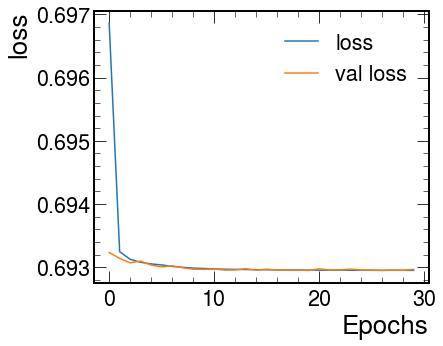

In [20]:
print('Starting training')
history = dctr.fit(X_train, Y_train,
                    epochs = 1000,
                    batch_size = BatchSize,
                    validation_data = (X_val, Y_val),
                    verbose = 1,
                    callbacks = callbacks)

dctr.save('/afs/desy.de/user/v/vaguglie/saved_models_Hdamp/'+save_label+'.h5')

plt.figure(figsize=(6,5))
plt.plot(history.history['loss'],     label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend(loc=0)
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.savefig(outDir+'history.pdf')


In [22]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)
save_label = 'DCTR_13TeV_2.305_BS40K_40Mevents_toBeSure'
dctr = tf.keras.models.load_model('/afs/desy.de/user/v/vaguglie/saved_models_Hdamp/'+save_label+'.h5')

# Check its architecture
dctr.summary()

2.6.2
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 6)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    700         input[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation[0][0]                 
________________________________________________________________________________________

In [23]:
dataset=np.load('/nfs/dust/cms/user/vaguglie/converterLHEfiles/Hdamp13TeV/X_Nom_TestAll_13TeV_test_plot.npz')
print(dataset.files)
X1_test=dataset['a']
X1_plot=dataset['b']
print(X1_test.shape)
print(X1_plot.shape)

['a', 'b']
(99951578, 2, 6)
(99951578, 8)


In [24]:
preds_1 = dctr.predict(X1_test, batch_size=BatchSize)

In [25]:
dataset=np.load('/nfs/dust/cms/user/vaguglie/converterLHEfiles/Hdamp13TeV/X_Up_TestAll_13TeV_test_plot.npz')
print(dataset.files)
X0_test=dataset['a']
X0_plot=dataset['b']
print(X0_test.shape)
print(X0_plot.shape)

['a', 'b']
(99951578, 2, 6)
(99951578, 8)


In [56]:
preds_0 = dctr.predict(X0_test, batch_size=BatchSize)

In [27]:
print(X0_test.shape)
print(X0_plot.shape)


(99951578, 2, 6)
(99951578, 8)


In [28]:
print(X0_plot.shape)
print(X1_plot.shape)

(99951578, 8)
(99951578, 8)


In [29]:
weights_1 = preds_1[:,0]/preds_1[:,1]

In [57]:
weights_0 = preds_0[:,0]/preds_0[:,1]

In [30]:
print(len(weights_1))

print(max(weights_1))
print(min(weights_1))

99951578
1.1703278
0.8228241


In [43]:
for i in range(0, len(weights_1)):
    if (X1_plot[i,0]>1000):
        weights_1[i] = 1

In [58]:
print(len(weights_0))

print(max(weights_0))
print(min(weights_0))

99951578
1.1677135
0.7018647


In [59]:
for i in range(0, len(weights_0)):
    if (X0_plot[i,0]>1000):
        weights_0[i] = 1

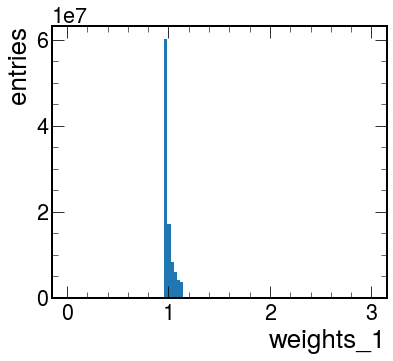

In [44]:
plt.figure(figsize=(6,5))
clip_val = 3.0
bins = np.linspace(0., clip_val, 101)
plt.hist(np.clip(weights_1, 0, clip_val), bins = bins)
plt.xlabel("weights_1")
plt.ylabel('entries')
#plt.title("Weights " + label_0 + r' $\rightarrow$ ' + label_0, fontsize=20)
#plt.yscale('log')
plt.show()

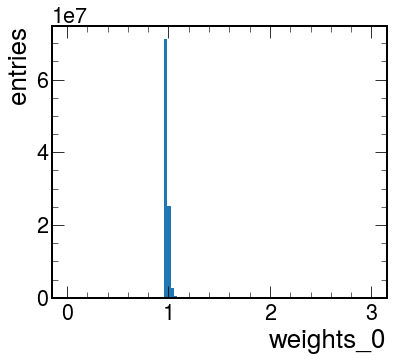

In [60]:
plt.figure(figsize=(6,5))
clip_val = 3.0
bins = np.linspace(0., clip_val, 101)
plt.hist(np.clip(weights_0, 0, clip_val), bins = bins)
plt.xlabel("weights_0")
plt.ylabel('entries')
#plt.title("Weights " + label_0 + r' $\rightarrow$ ' + label_0, fontsize=20)
#plt.yscale('log')
plt.show()

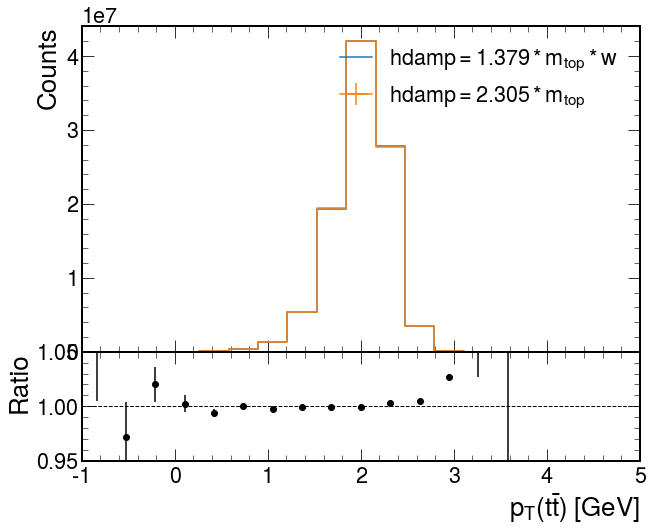

In [45]:
from hist import Hist
import mplhep

h0 = Hist.new.Reg(19, -1, 5, name=r"$hdamp=m_{top}$").Double()
h0.fill(X0_test[:,0,0])
h1 = Hist.new.Reg(19, -1, 5, name=r'$p_T(t\bar{t})\; [GeV]$').Double()
h1.fill(X1_test[:,0,0], weight=weights_1)

fig = plt.figure(figsize=(10, 8))
main_ax_artists, sublot_ax_arists = h1.plot_ratio(
    h0,
    rp_ylabel=r"Ratio",
   rp_num_label=r"$hdamp=1.379*m_{top}*w$",
    rp_denom_label=r"$hdamp=2.305*m_{top}$",
    rp_uncert_draw_type="line",  # line or bar
)

plt.ylim(0.95,1.05)
plt.show()


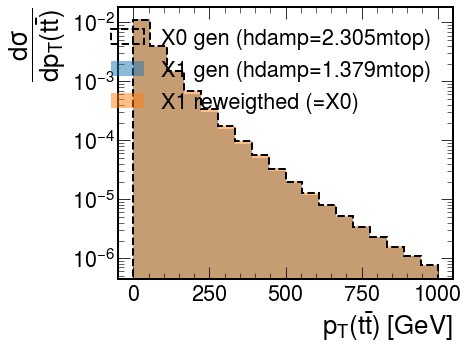

In [46]:
# Define default plot styles
plot_style_0 = {'histtype':'step', 'color':'black', 'linewidth':2, 'linestyle':'--', 'density':True}
plot_style_1 = {'alpha':0.5, 'density':True}

plt.figure(figsize=(6,5))
bins = np.linspace(0,1000,19)
hist0 = plt.hist(X0_plot[:,0], bins = bins, label = 'X0 gen (hdamp=2.305mtop)', **plot_style_0)
hist1 = plt.hist(X1_plot[:,0], bins = bins, label = 'X1 gen (hdamp=1.379mtop)', **plot_style_1)
hist2 = plt.hist(X1_plot[:,0], bins = bins, label =  'X1 reweigthed (=X0)', weights=weights_1, **plot_style_1)

plt.xlabel(r'$p_T(t\bar{t}) \; [GeV]$')
plt.ylabel(r'$\dfrac{d\sigma}{dp_T(t\bar{t})}$')
#plt.ylim([10E-6,100])
plt.legend()
plt.yscale('log')
plt.show()

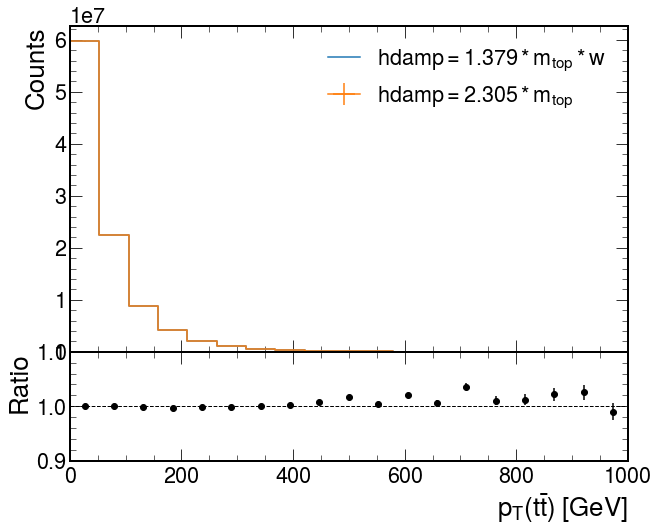

In [47]:
from hist import Hist
import mplhep

h0 = Hist.new.Reg(19, 0, 1000, name=r"$hdamp=m_{top}$").Double()
h0.fill(X0_plot[:,0])
h1 = Hist.new.Reg(19, 0, 1000, name=r'$p_T(t\bar{t})\; [GeV]$').Double()
h1.fill(X1_plot[:,0], weight=weights_1)

fig = plt.figure(figsize=(10, 8))
main_ax_artists, sublot_ax_arists = h1.plot_ratio(
    h0,
    rp_ylabel=r"Ratio",
   rp_num_label=r"$hdamp=1.379*m_{top}*w$",
    rp_denom_label=r"$hdamp=2.305*m_{top}$",
    rp_uncert_draw_type="line",  # line or bar
)
plt.ylim(0.9,1.10)
plt.show()


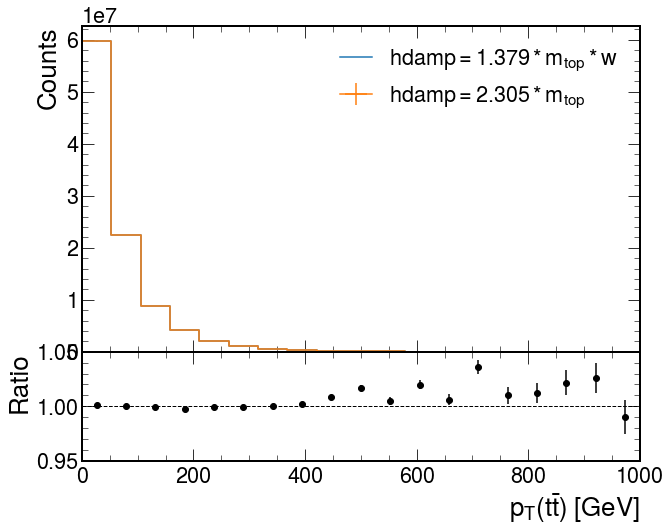

In [48]:
from hist import Hist
import mplhep

h0 = Hist.new.Reg(19, 0, 1000, name=r"$hdamp=m_{top}$").Double()
h0.fill(X0_plot[:,0])
h1 = Hist.new.Reg(19, 0, 1000, name=r'$p_T(t\bar{t})\; [GeV]$').Double()
h1.fill(X1_plot[:,0], weight=weights_1)

fig = plt.figure(figsize=(10, 8))
main_ax_artists, sublot_ax_arists = h1.plot_ratio(
    h0,
    rp_ylabel=r"Ratio",
   rp_num_label=r"$hdamp=1.379*m_{top}*w$",
    rp_denom_label=r"$hdamp=2.305*m_{top}$",
    rp_uncert_draw_type="line",  # line or bar
)
plt.ylim(0.95,1.05)
plt.show()


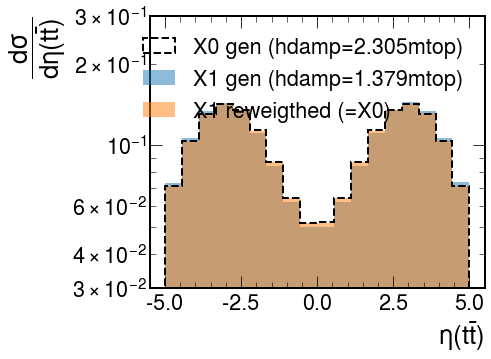

In [49]:
# Define default plot styles
plot_style_0 = {'histtype':'step', 'color':'black', 'linewidth':2, 'linestyle':'--', 'density':True}
plot_style_1 = {'alpha':0.5, 'density':True}

plt.figure(figsize=(6,5))
bins = np.linspace(-5,5,19)
hist0 = plt.hist(X0_plot[:,2], bins = bins, label = 'X0 gen (hdamp=2.305mtop)', **plot_style_0)
hist1 = plt.hist(X1_plot[:,2], bins = bins, label = 'X1 gen (hdamp=1.379mtop)', **plot_style_1)
hist2 = plt.hist(X1_plot[:,2], bins = bins, label =  'X1 reweigthed (=X0)', weights=weights_1, **plot_style_1)

plt.xlabel(r'$\eta(t\bar{t})$')
plt.ylabel(r'$\dfrac{d\sigma}{d\eta(t\bar{t})}$')
plt.ylim([0.03,0.3])
plt.legend()
plt.yscale('log')
plt.show()


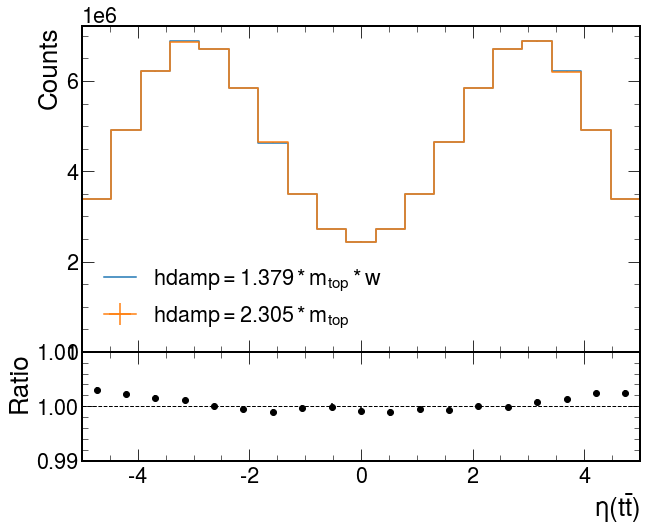

In [50]:
from hist import Hist
import mplhep

h0 = Hist.new.Reg(19, -5, 5, name=r"$hdamp=m_{top}$").Double()
h0.fill(X0_plot[:,2])
h1 = Hist.new.Reg(19, -5, 5, name=r'$\eta(t\bar{t})$').Double()
h1.fill(X1_plot[:,2], weight=weights_1)

fig = plt.figure(figsize=(10, 8))
main_ax_artists, sublot_ax_arists = h1.plot_ratio(
    h0,
    rp_ylabel=r"Ratio",
   rp_num_label=r"$hdamp=1.379*m_{top}*w$",
    rp_denom_label=r"$hdamp=2.305*m_{top}$",
    rp_uncert_draw_type="line",  # line or bar
)
plt.ylim(0.99,1.01)
plt.show()


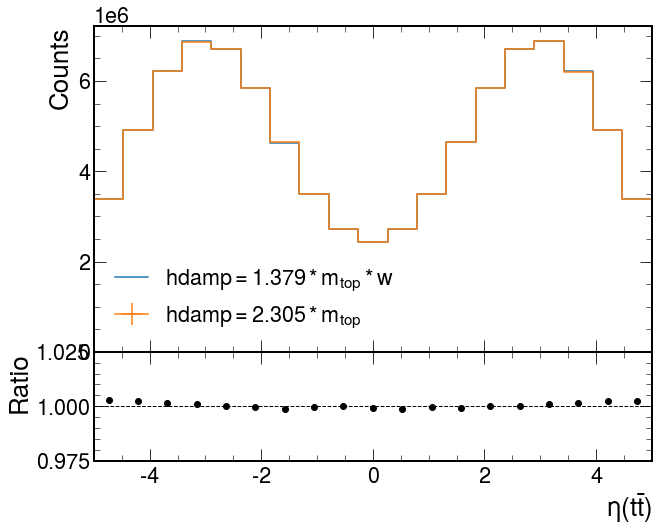

In [51]:
from hist import Hist
import mplhep

h0 = Hist.new.Reg(19, -5, 5, name=r"$hdamp=m_{top}$").Double()
h0.fill(X0_plot[:,2])
h1 = Hist.new.Reg(19, -5, 5, name=r'$\eta(t\bar{t})$').Double()
h1.fill(X1_plot[:,2], weight=weights_1)

fig = plt.figure(figsize=(10, 8))
main_ax_artists, sublot_ax_arists = h1.plot_ratio(
    h0,
    rp_ylabel=r"Ratio",
   rp_num_label=r"$hdamp=1.379*m_{top}*w$",
    rp_denom_label=r"$hdamp=2.305*m_{top}$",
    rp_uncert_draw_type="line",  # line or bar
)
plt.ylim(0.975,1.025)
plt.show()



'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


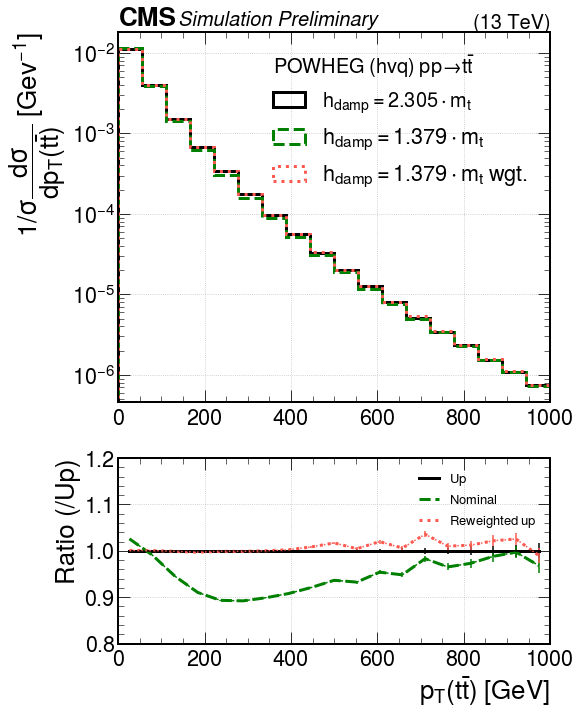

In [52]:
pythia_text = r'$POWHEG \; (hvq) \; pp \to  t\bar{t}$'
def make_legend(ax, title):
    leg = ax.legend(frameon=False)
    leg.set_title(title, prop={'size':20})
    leg.texts[0].set_fontsize(20)
    leg._legend_box.align = "left"
    plt.tight_layout()

# Global plot settings
from matplotlib import rc
import matplotlib.font_manager

import mplhep as hep
plt.style.use(hep.style.CMS)

plot_style_10a = {'histtype':'step', 'color':'Green', 'linewidth':3, 'linestyle':'--', 'density':True}
plot_style_11a = {'histtype':'step', 'color':'black', 'linewidth':3, 'linestyle':'-', 'density':True}
plot_style_12a = {'histtype':'step', 'color':'#FC5A50', 'linewidth':3, 'linestyle':':', 'density':True}

hist3, edges3 = np.histogram(X0_plot[:,0], bins=19, range=(0, 1000))
hist5, edges5 = np.histogram(X1_plot[:,0], bins=19, range=(0, 1000))
hist4, edges4 = np.histogram(X1_plot[:,0], bins=19, range=(0, 1000),  weights=weights_1)

# Calculate the ratio of the histograms
ratioNom = hist3 / hist3
ratio_errNom = np.sqrt(hist3) / hist3
ratio = hist4 / hist3
ratio_err = np.sqrt(hist4) / hist3

ratioB = hist5 / hist3
ratio_errB = np.sqrt(hist5) / hist3

# Create figure with two subplots
fig, axes = plt.subplots(nrows=2, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 1]})

# First subplot
bins = np.linspace(0, 1000, 19)
hist0 = axes[0].hist(X0_plot[:,0], bins=bins, label=r'$h_{damp}=2.305 \cdot m_{t}$', **plot_style_11a)
hist1 = axes[0].hist(X1_plot[:,0], bins=bins, label=r'$h_{damp}=1.379 \cdot m_{t}$', **plot_style_10a)
hist2 = axes[0].hist(X1_plot[:,0], bins=bins, label=r'$h_{damp}=1.379 \cdot m_{t} \; wgt.$', weights=weights_1, **plot_style_12a)

make_legend(axes[0], pythia_text)
axes[0].set_ylabel(r'$1 / \sigma \dfrac{d\sigma}{dp_T(t\bar{t})} \; [Gev^{-1}]$')
axes[0].set_yscale('log')
axes[0].grid(True)

# Second subplot
bin_centers = (edges4[:-1] + edges4[1:]) / 2.0
axes[1].errorbar(bin_centers, ratioNom, yerr=ratio_errNom, fmt='-', color='black')
axes[1].errorbar(bin_centers, ratioB, yerr=ratio_errB, fmt='--', color='green')
axes[1].errorbar(bin_centers, ratio, yerr=ratio_err, fmt=':', color='#FC5A50')
axes[1].plot(bin_centers, ratioNom, '-', color='black',linewidth=3,label=r'$Up$')
axes[1].plot(bin_centers, ratioB, '--', color='green',linewidth=3, label=r'$Nominal$')
axes[1].plot(bin_centers, ratio, ':', color='#FC5A50',linewidth=3, label=r'$Reweighted \; up$')
axes[1].set_xlabel(r'$p_T(t\bar{t}) \;[GeV]$')
axes[1].set_ylabel('Ratio (/Up)')
axes[1].grid(True)

axes[1].set_xlim([0,1000])
axes[0].set_xlim([0,1000])

axes[1].set_ylim([0.8,1.20])
axes[1].legend(loc='upper right', fontsize=13)

plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.1, top=0.95)

#hep.cms.label(ax=axes[0], data=False, paper=False, lumi=None, fontsize=20, loc=0)
hep.cms.text("Simulation Preliminary", loc=0, fontsize=20, ax=axes[0])
axes[0].text(1.0, 1.05, "(13 TeV)", ha="right", va="top", fontsize=20, transform=axes[0].transAxes)



# Save the figure
plt.savefig('/afs/desy.de/user/v/vaguglie/www/NN/plotNota/HdampPtRatio13TeV.pdf')

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


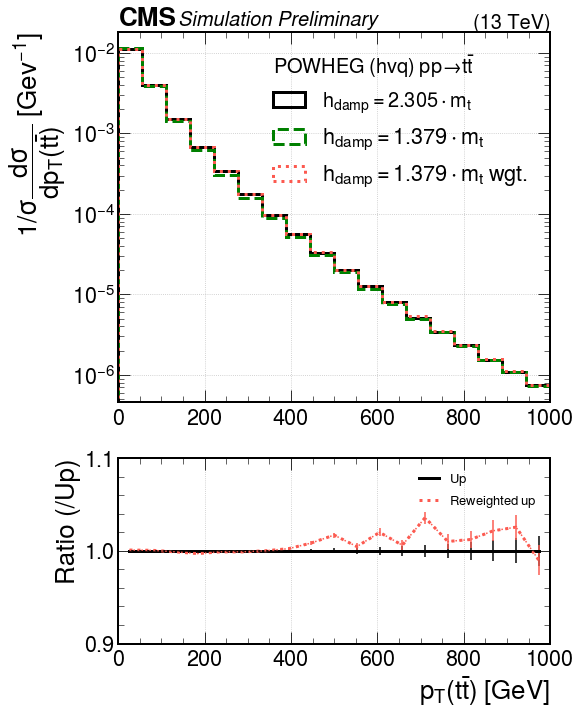

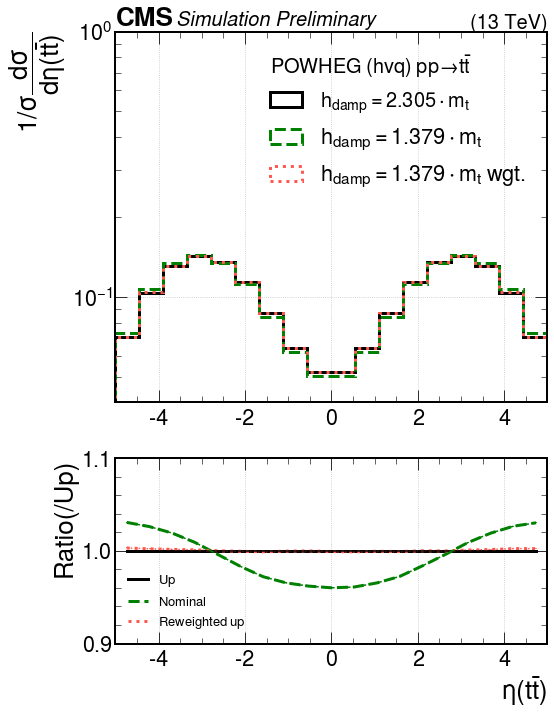

In [53]:
hist3, edges3 = np.histogram(X0_plot[:,0], bins=19, range=(0, 1000))
hist5, edges5 = np.histogram(X1_plot[:,0], bins=19, range=(0, 1000))
hist4, edges4 = np.histogram(X1_plot[:,0], bins=19, range=(0, 1000),  weights=weights_1)

# Calculate the ratio of the histograms
ratioNom = hist3 / hist3
ratio_errNom = np.sqrt(hist3) / hist3
ratio = hist4 / hist3
ratio_err = np.sqrt(hist4) / hist3

ratioB = hist5 / hist3
ratio_errB = np.sqrt(hist5) / hist3

# Create figure with two subplots
fig, axes = plt.subplots(nrows=2, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 1]})

# First subplot
bins = np.linspace(0, 1000, 19)
hist0 = axes[0].hist(X0_plot[:,0], bins=bins, label=r'$h_{damp}=2.305 \cdot m_{t}$', **plot_style_11a)
hist1 = axes[0].hist(X1_plot[:,0], bins=bins, label=r'$h_{damp}=1.379 \cdot m_{t}$', **plot_style_10a)
hist2 = axes[0].hist(X1_plot[:,0], bins=bins, label=r'$h_{damp}=1.379 \cdot m_{t} \; wgt.$', weights=weights_1, **plot_style_12a)

make_legend(axes[0], pythia_text)
axes[0].set_ylabel(r'$1 / \sigma \dfrac{d\sigma}{dp_T(t\bar{t})} \; [Gev^{-1}]$')
axes[0].set_yscale('log')
axes[0].grid(True)

# Second subplot
bin_centers = (edges4[:-1] + edges4[1:]) / 2.0
axes[1].errorbar(bin_centers, ratioNom, yerr=ratio_errNom, fmt='-', color='black')
#axes[1].errorbar(bin_centers, ratioB, yerr=ratio_errB, fmt='--', color='green')
axes[1].errorbar(bin_centers, ratio, yerr=ratio_err, fmt=':', color='#FC5A50')
axes[1].plot(bin_centers, ratioNom, '-', color='black',linewidth=3,label=r'$Up$')
#axes[1].plot(bin_centers, ratioB, '--', color='green',linewidth=3, label=r'$Nominal$')
axes[1].plot(bin_centers, ratio, ':', color='#FC5A50',linewidth=3, label=r'$Reweighted \; up$')
axes[1].set_xlabel(r'$p_T(t\bar{t}) \;[GeV]$')
axes[1].set_ylabel('Ratio (/Up)')
axes[1].grid(True)

axes[1].set_xlim([0,1000])
axes[0].set_xlim([0,1000])

axes[1].set_ylim([0.9,1.10])
axes[1].legend(loc='upper right', fontsize=13)

plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.1, top=0.95)

#hep.cms.label(ax=axes[0], data=False, paper=False, lumi=None, fontsize=20, loc=0)
hep.cms.text("Simulation Preliminary", loc=0, fontsize=20, ax=axes[0])
axes[0].text(1.0, 1.05, "(13 TeV)", ha="right", va="top", fontsize=20, transform=axes[0].transAxes)



# Save the figure
plt.savefig('/afs/desy.de/user/v/vaguglie/www/NN/plotNota/HdampPtRatio13TeVZoom.pdf')

hist3, edges3 = np.histogram(X0_plot[:,2], bins=19, range=(-5, 5))
hist5, edges5 = np.histogram(X1_plot[:,2], bins=19, range=(-5, 5))
hist4, edges4 = np.histogram(X1_plot[:,2], bins=19, range=(-5, 5),  weights=weights_1)

# Calculate the ratio of the histograms
ratioNom = hist3 / hist3
ratio_errNom = np.sqrt(hist3) / hist3
ratio = hist4 / hist3
ratio_err = np.sqrt(hist4) / hist3

ratioB = hist5 / hist3
ratio_errB = np.sqrt(hist5) / hist3

# Create figure with two subplots
fig, axes = plt.subplots(nrows=2, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 1]})


# First subplot
bins = np.linspace(-5, 5, 19)
hist0 = axes[0].hist(X0_plot[:,2], bins=bins, label=r'$h_{damp}=2.305 \cdot m_{t}$', **plot_style_11a)
hist1 = axes[0].hist(X1_plot[:,2], bins=bins, label=r'$h_{damp}=1.379 \cdot m_{t}$', **plot_style_10a)
hist2 = axes[0].hist(X1_plot[:,2], bins=bins, label=r'$h_{damp}=1.379 \cdot m_{t} \; wgt.$', weights=weights_1, **plot_style_12a)

make_legend(axes[0], pythia_text)
axes[0].set_ylabel(r'$1 / \sigma \dfrac{d\sigma}{d\eta(t\bar{t})}$')
axes[0].set_yscale('log')
axes[0].grid(True)

# Second subplot
bin_centers = (edges4[:-1] + edges4[1:]) / 2.0
axes[1].errorbar(bin_centers, ratio, yerr=ratio_err, fmt=':', color='#FC5A50')
axes[1].errorbar(bin_centers, ratioNom, yerr=ratio_errNom, fmt='-', color='black')
axes[1].errorbar(bin_centers, ratioB, yerr=ratio_errB, fmt='--', color='green')
axes[1].plot(bin_centers, ratioNom, '-', color='black',linewidth=3, label=r'$Up$')
axes[1].plot(bin_centers, ratioB, '--', color='green',linewidth=3, label=r'$Nominal$')
axes[1].plot(bin_centers, ratio, ':', color='#FC5A50',linewidth=3, label=r'$Reweighted \; up$')
axes[1].set_xlabel(r'$\eta(t\bar{t})$')
axes[1].set_ylabel('Ratio(/Up)')
axes[1].grid(True)

plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.1, top=0.95)
axes[0].set_ylim([0.04, 1])
axes[1].set_ylim([0.9,1.1])

axes[0].set_xlim([-5,5])
axes[1].set_xlim([-5,5])
axes[1].legend(loc='lower left', fontsize=13)

#hep.cms.label(ax=axes[0], data=False, paper=False, lumi=None, fontsize=20, loc=0)
hep.cms.text("Simulation Preliminary", loc=0, fontsize=20, ax=axes[0])
axes[0].text(1.0, 1.05, "(13 TeV)", ha="right", va="top", fontsize=20, transform=axes[0].transAxes)



# Save the figure
plt.savefig('/afs/desy.de/user/v/vaguglie/www/NN/plotNota/HdampEtaRatio13TeV.pdf')

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


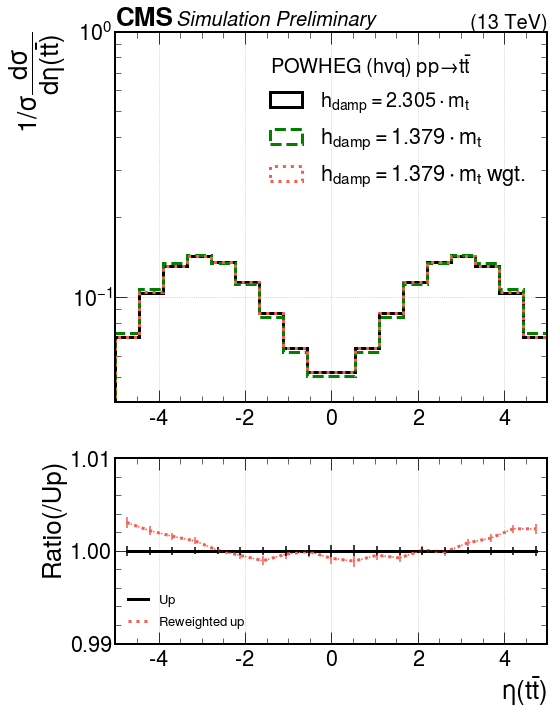

In [54]:
hist3, edges3 = np.histogram(X0_plot[:,2], bins=19, range=(-5, 5))
hist5, edges5 = np.histogram(X1_plot[:,2], bins=19, range=(-5, 5))
hist4, edges4 = np.histogram(X1_plot[:,2], bins=19, range=(-5, 5),  weights=weights_1)

# Calculate the ratio of the histograms
ratioNom = hist3 / hist3
ratio_errNom = np.sqrt(hist3) / hist3
ratio = hist4 / hist3
ratio_err = np.sqrt(hist4) / hist3

ratioB = hist5 / hist3
ratio_errB = np.sqrt(hist5) / hist3

# Create figure with two subplots
fig, axes = plt.subplots(nrows=2, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 1]})


# First subplot
bins = np.linspace(-5, 5, 19)
hist0 = axes[0].hist(X0_plot[:,2], bins=bins, label=r'$h_{damp}=2.305 \cdot m_{t}$', **plot_style_11a)
hist1 = axes[0].hist(X1_plot[:,2], bins=bins, label=r'$h_{damp}=1.379 \cdot m_{t}$', **plot_style_10a)
hist2 = axes[0].hist(X1_plot[:,2], bins=bins, label=r'$h_{damp}=1.379 \cdot m_{t} \; wgt.$', weights=weights_1, **plot_style_12a)

make_legend(axes[0], pythia_text)
axes[0].set_ylabel(r'$1 / \sigma \dfrac{d\sigma}{d\eta(t\bar{t})}$')
axes[0].set_yscale('log')
axes[0].grid(True)

# Second subplot
bin_centers = (edges4[:-1] + edges4[1:]) / 2.0
axes[1].errorbar(bin_centers, ratio, yerr=ratio_err, fmt=':', color='#FC5A50')
axes[1].errorbar(bin_centers, ratioNom, yerr=ratio_errNom, fmt='-', color='black')
axes[1].plot(bin_centers, ratioNom, '-', color='black',linewidth=3, label=r'$Up$')
axes[1].plot(bin_centers, ratio, ':', color='#FC5A50',linewidth=3, label=r'$Reweighted \; up$')
axes[1].set_xlabel(r'$\eta(t\bar{t})$')
axes[1].set_ylabel('Ratio(/Up)')
axes[1].grid(True)

plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.1, top=0.95)
axes[0].set_ylim([0.04, 1])
axes[1].set_ylim([0.99,1.01])

axes[0].set_xlim([-5,5])
axes[1].set_xlim([-5,5])
axes[1].legend(loc='lower left', fontsize=13)

#hep.cms.label(ax=axes[0], data=False, paper=False, lumi=None, fontsize=20, loc=0)
hep.cms.text("Simulation Preliminary", loc=0, fontsize=20, ax=axes[0])
axes[0].text(1.0, 1.05, "(13 TeV)", ha="right", va="top", fontsize=20, transform=axes[0].transAxes)



# Save the figure
plt.savefig('/afs/desy.de/user/v/vaguglie/www/NN/plotNota/HdampEtaRatio13TeVzoom.pdf')